In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
from synth_dim_model import *

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

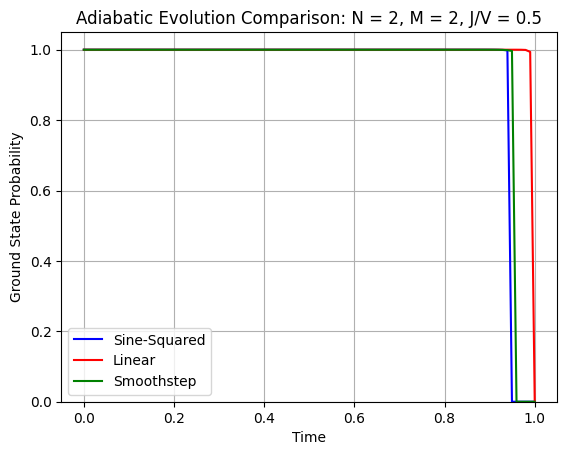

In [2]:
N = 2
M = 2
mu = 100

V = 1
J_V_ratio = 0.5
J = J_V_ratio * V

t_total = 100  # Increase to make evolution slower
t_points = 100  # Higher resolution for better accuracy

H0 = construct_initial_hamiltonian(N, M, mu)
Hf = construct_hamiltonian(N, M, J, V)

eigvals, eigvecs = np.linalg.eigh(H0)
psi0 = eigvecs[:, 0]
psi0 = psi0 / np.linalg.norm(psi0)  # Ensure normalization

interpolation_types = ["sine-squared", "linear", "smoothstep"]
colors = ["b", "r", "g"]
labels = ["Sine-Squared", "Linear", "Smoothstep"]

fig, ax = plt.subplots()

for i, interpolation_type in enumerate(interpolation_types):
    # Evolve the system for each interpolation type
    t, psi_t = evolve_system(H0, Hf, psi0, t_total, t_points, interpolation_type)
    
    # Calculate ground state probabilities
    ground_state_prob = np.zeros_like(t)
    for j in range(len(t)):
        if interpolation_type == "sine-squared":
            s = np.sin((np.pi/2) * (t[j] / t_total))**2
        elif interpolation_type == "linear":
            s = t[j] / t_total
        elif interpolation_type == "smoothstep":
            s = 3*(t[j] / t_total)**2 - 2*(t[j] / t_total)**3
        
        H_s = construct_intermediate_hamiltonian(H0, Hf, s)
        _, eigvecs_s = np.linalg.eigh(H_s)
        psi_ground_state_s = eigvecs_s[:, 0]  # Ground state at time t
        ground_state_prob[j] = np.abs(np.dot(np.conjugate(psi_ground_state_s), psi_t[:, j]))**2
    
    # Plot the ground state probability for each interpolation type
    ax.plot(t/t_total, ground_state_prob, "-", color=colors[i], label=labels[i])

ax.set_xlabel("Time")
ax.set_ylabel("Ground State Probability")
ax.set_title(f"Adiabatic Evolution Comparison: N = {N}, M = {M}, J/V = {round(J_V_ratio, 3)}")
ax.set_ylim(0, 1.05)
ax.grid()
ax.legend()

plt.show()